# Part A: Text Classification - Binary Classification

1. Use Pandas to read the reviews.xlsx file.

2. Display the counts of 1,2,3,4, and 5 in the 'Rating' column.

3. Since this is a binary classification problem, all 4s and 5s will be treated as 1 (i.e., high rating) and 1 and 2 would be 0 (i.e., a low rating). Note that we are disregarding 3s. Create a column called "Target" that contains 1s (corresponding to ratings of 4 & 5) and 0s (for ratings of 1 and 2).

4. Display the proportion of 1s and 0s in the Target column.

5. Write a function to preprocess your text. It should do the following: a) Convert text to lowercase; b) remove punctuation and digits; c) remove stopwords; d) lemmatize the text and include only adjectives, adverbs, nouns, and verbs. You must also ensure that only words having 3 or more characters are included. Your function should take some text and return the preprocessed version of it.

6. Create a column called 'Clean Text' that is obtained by preprocessing the 'Review Text' column.

7. Use the 'Clean Text' column to create the corpus. Create labels using the 'Target' column.

8. Use train_test_split to create your training and testing sets.

8A. Create a vectorizer using TfidfVectorizer. Use the vectorizer to transform x_train and x_test (this will give you the document-term matrices).

9. You will build two predictive models, one that uses Naive Bayes and the other that uses LogisticRegression.

10. Display the confusion matrix and classification report. Note that you may have to try out a few things to ensure that the performance is reasonable. When you are satisfied with the performance of your model(s), you may move to the next step.


In [1]:
import pandas as pd # to read excel file
df = pd.read_excel('reviews.xlsx')
df.head()

Review Text  Rating
0  3 tags sewn in, 2 small (about 1'' long) and 1...       1
1  I was really hoping to like this, but it did n...       1
2  I usually wear a medium and bought a small. it...       1
3  I was very excited to order this top in red xs...       1
4  This is so thin and poor quality. especially f...       1

In [2]:
df.shape

(1405, 2)

In [3]:
df.nunique()

Review Text    1356
Rating            5
dtype: int64

In [61]:
df.Rating.value_counts() # Display the counts of 1,2,3,4, and 5 in the 'Rating' column.

4    390
5    377
1    293
2    198
3     98
Name: Rating, dtype: int64

In [5]:
df.dropna(inplace=True) # drop the rows with missing values
df.shape

(1356, 2)

In [6]:
df_new = df.drop(df[df['Rating']==3].index) #drop the rows with rating of 3
df_new['Rating'].value_counts()

4    390
5    377
1    293
2    198
Name: Rating, dtype: int64

In [7]:
ratings =[] #convert the rating to binary values
for rating in df['Rating'].values:
    if rating == 1 or rating == 2:
        ratings.append(0)
    else:
        ratings.append(1)

ratings

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [62]:
df["Target"]=ratings # create a new column of binary values only
df.head(5)

Review Text  Rating  Target  \
0  3 tags sewn in, 2 small (about 1'' long) and 1...       1       0   
1  I was really hoping to like this, but it did n...       1       0   
2  I usually wear a medium and bought a small. it...       1       0   
3  I was very excited to order this top in red xs...       1       0   
4  This is so thin and poor quality. especially f...       1       0   

                                          Clean Text  
0  tag sew small long huge very then thread plast...  
1  really hope like not look way model not sharkb...  
2  usually medium buy small fit shape not baby do...  
3  very excited order top red cute huge shapeless...  
4  thin poor quality especially price thin pajama...

In [65]:
# Display the proportion of 0s and 1s in the Target column
df["Target"].value_counts()

1    865
0    491
Name: Target, dtype: int64

In [70]:
print("Proportion of 0s is", round(491/(865+491),2), "and Proportion of 1s is", round(865/(865+491),2))

Proportion of 0s is 0.36 and Proportion of 1s is 0.64


In [72]:
#simple preprocessing function
import re
import spacy
nlp = spacy.load('en_core_web_lg')
def preprocess(txt):
    txt = txt.lower() #normalize text
    txt = re.sub(r'[^a-zA-Z]'," ", txt) # remove digits and punctuations
    doc = nlp(txt)
    lemmatized_words = [token.lemma_ for token in doc] # lemmatizing the words
    return " ".join(lemmatized_words)

In [73]:
texts = [preprocess(txt) for txt in df['Review Text'].values]
texts

['   tag sew in     small   about      long   and    huge   about      x        very itchy so I cut they out   then the thread leave behind be plasticy and even more itchy   how can you make an intimate item with such itchy tag   not comfortable at all   also    I love bralette and wear they all the time include to work   I be a b cup   however   this one be so thin and flimsy that it give no support even to a b cup    so for I this would only be a lounge bralette    if it wasn t so itchy',
 'I be really hope to like this   but it do not look the way it do on the model   at least not on I   the sharkbite hem be much more pronounced and loose   the one in the photo look like it be pin back   I be       and usually wear a medium or large   I get a medium and there be a lot more material on the bottom half than the photo show   it make I look big and be not flattering   material have a nice weave but it s thin and delicate   I buy the   holly   deep olive and the blue   color',
 'I usuall

In [74]:
from nltk import pos_tag 
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ntnkh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
# filter only adjectives, adverbs, nouns, and verbs; and ensure that there are only words having 3 or more characters
text_filtered=[]
from textblob import TextBlob
for text in texts:
    text = TextBlob(text)
    tokens = text.words
    tagged_tokens = nltk.pos_tag(tokens)
    words = [word for (word, pos) in tagged_tokens if pos in ["NN", "VB", "JJ", "RB"] and len(word)>=3] 
    text_filtered.append(words)
text_filtered

[['tag',
  'sew',
  'small',
  'long',
  'huge',
  'very',
  'then',
  'thread',
  'plasticy',
  'even',
  'itchy',
  'make',
  'intimate',
  'item',
  'such',
  'not',
  'comfortable',
  'also',
  'bralette',
  'time',
  'work',
  'cup',
  'however',
  'thin',
  'give',
  'support',
  'even',
  'cup',
  'only',
  'lounge',
  'bralette',
  'itchy'],
 ['really',
  'hope',
  'like',
  'not',
  'look',
  'way',
  'model',
  'not',
  'sharkbite',
  'hem',
  'much',
  'pronounced',
  'one',
  'photo',
  'look',
  'usually',
  'medium',
  'large',
  'medium',
  'there',
  'lot',
  'material',
  'bottom',
  'half',
  'photo',
  'show',
  'big',
  'not',
  'material',
  'nice',
  'weave',
  'thin',
  'delicate',
  'holly',
  'deep',
  'olive',
  'blue',
  'color'],
 ['usually',
  'medium',
  'buy',
  'small',
  'fit',
  'shape',
  'not',
  'baby',
  'doll',
  'dress',
  'top',
  'tent',
  'daughter',
  'say',
  'piece',
  'tablecloth',
  'back'],
 ['very',
  'excited',
  'order',
  'top',
  'r

In [76]:
corpus=[]
from nltk.tokenize.treebank import TreebankWordDetokenizer
for line in text_filtered:
    a = TreebankWordDetokenizer().detokenize(line)
    corpus.append(a)
corpus

['tag sew small long huge very then thread plasticy even itchy make intimate item such not comfortable also bralette time work cup however thin give support even cup only lounge bralette itchy',
 'really hope like not look way model not sharkbite hem much pronounced one photo look usually medium large medium there lot material bottom half photo show big not material nice weave thin delicate holly deep olive blue color',
 'usually medium buy small fit shape not baby doll dress top tent daughter say piece tablecloth back',
 'very excited order top red cute huge shapeless support have back look other review',
 'thin poor quality especially price thin pajama button terrible little shell button not have fast',
 'title fabric top good bad part design color vibrant combination material shoulder knit sweater navy fabric interesting however positive comment end top scratchy stiff frankly uncomfortable not imagine want wear benefit lining have problem scratchy itchy stiff fabric',
 'love fabric 

In [77]:
df['Clean Text'] = corpus

In [78]:
df.head(5)

Review Text  Rating  Target  \
0  3 tags sewn in, 2 small (about 1'' long) and 1...       1       0   
1  I was really hoping to like this, but it did n...       1       0   
2  I usually wear a medium and bought a small. it...       1       0   
3  I was very excited to order this top in red xs...       1       0   
4  This is so thin and poor quality. especially f...       1       0   

                                          Clean Text  
0  tag sew small long huge very then thread plast...  
1  really hope like not look way model not sharkb...  
2  usually medium buy small fit shape not baby do...  
3  very excited order top red cute huge shapeless...  
4  thin poor quality especially price thin pajama...

In [80]:
labels = list(df['Target'])
labels[:5]

[0, 0, 0, 0, 0]

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(corpus, labels, stratify = labels, test_size = 0.3, random_state = 1)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_dtm = vectorizer.fit_transform(x_train)
x_test_dtm = vectorizer.transform(x_test)

# Naive Bayes

In [83]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

classifier = BernoulliNB()
classifier.fit(x_train_dtm, y_train)
predicted = classifier.predict(x_test_dtm)
classifier.score(x_test_dtm, y_test)

0.7788697788697788

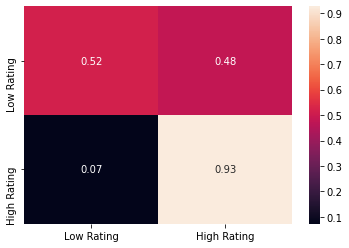

In [84]:
import seaborn as sns
labels = ['Low Rating', 'High Rating']
sns.heatmap(confusion_matrix(y_test, predicted, normalize = 'true'), xticklabels = labels, yticklabels = labels,
           annot = True, fmt = '.2f')

In [85]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       147
           1       0.77      0.93      0.84       260

    accuracy                           0.78       407
   macro avg       0.79      0.72      0.74       407
weighted avg       0.78      0.78      0.77       407



# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(x_train_dtm, y_train)
predicted_ = model.predict(x_test_dtm)
model.score(x_test_dtm, y_test)

0.7813267813267813

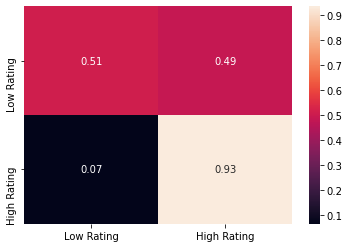

In [87]:
import seaborn as sns
labels = ['Low Rating', 'High Rating']
sns.heatmap(confusion_matrix(y_test, predicted_, normalize = 'true'), xticklabels = labels, yticklabels = labels,
           annot = True, fmt = '.2f')

In [88]:
print(classification_report(y_test,predicted_))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       147
           1       0.77      0.93      0.85       260

    accuracy                           0.78       407
   macro avg       0.79      0.72      0.74       407
weighted avg       0.79      0.78      0.77       407



## Accuracy of Logistic Regression is 0.7813 > 0.7789 of Naive Bayes
## -> Choose Logistic Regession model to move forward


# Part B: Text Explainer

1. Use LIME and ELI5 to see if you can explain what your model is doing. Test it on a couple of cases.

In [89]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [90]:
# take one line of text in the dataset as an example
x_test[1]

'cute white shirt different style didn work body good price point basic fabric'

In [91]:
y_test[1]

1

In [92]:
y_pred_prob = model.predict_proba(x_test_dtm)[:, 1]
c = make_pipeline(vectorizer, model)
mystring = list(x_test)[1]
print(c.predict_proba([mystring]))
class_names = ["Low Rating", "High Rating"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba,num_features=10)
exp.as_list()

[[0.3960739 0.6039261]]


[('didn', -0.08235044438832707),
 ('basic', 0.06472507607082927),
 ('shirt', -0.05783335120385909),
 ('cute', 0.05503958458572762),
 ('style', 0.046535975057959304),
 ('fabric', -0.04254557364639788),
 ('good', 0.040504242264230515),
 ('white', -0.009030468108824494),
 ('price', -0.008335825847424044),
 ('different', 0.005330207366607445)]

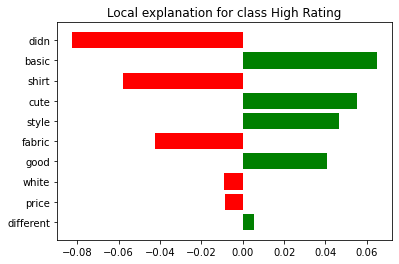

In [93]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [94]:
exp.show_in_notebook(text=False)

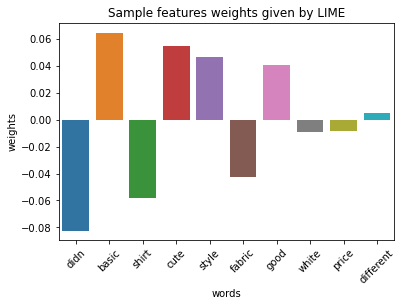

In [95]:
from collections import OrderedDict
import matplotlib.pyplot as plt
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

sns.barplot(x = "words", y = "weights", data = lime_weights)
plt.xticks(rotation = 45)
plt.title("Sample features weights given by LIME")
plt.show()

In [96]:
# take another example
x_test[24]

'whim pattern bottom normally thing pleasantly well look great lot compliment'

In [97]:
y_test[24]

1

In [98]:
y_pred_prob = model.predict_proba(x_test_dtm)[:, 1]
c = make_pipeline(vectorizer, model)
mystring = list(x_test)[24]
print(c.predict_proba([mystring]))
class_names = ["Low Rating", "High Rating"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba,num_features=10)
exp.as_list()

[[0.13239691 0.86760309]]


[('great', 0.07010613176293384),
 ('compliment', 0.0557335006390714),
 ('normally', 0.031992781576066505),
 ('well', 0.03012216832612038),
 ('lot', 0.030021788310694894),
 ('look', -0.029209379988623),
 ('thing', -0.01910324476375483),
 ('pleasantly', -0.011383040887573437),
 ('bottom', -0.010709402013660269),
 ('pattern', 0.008683759321828018)]

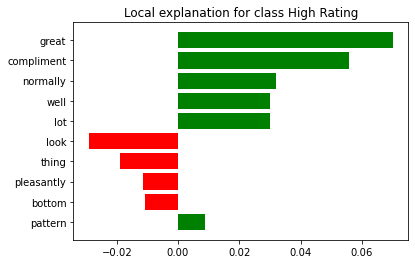

In [99]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [100]:
exp.show_in_notebook (text=False)

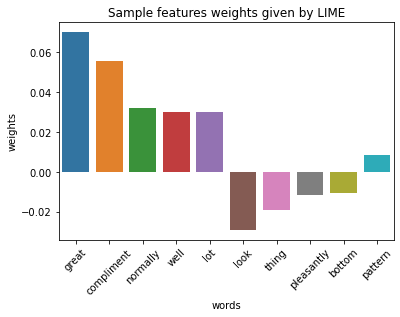

In [101]:
from collections import OrderedDict
import matplotlib.pyplot as plt
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

sns.barplot(x = "words", y = "weights", data = lime_weights)
plt.xticks(rotation = 45)
plt.title("Sample features weights given by LIME")
plt.show()

In [102]:
x_test[79]
y_test[79]

1

In [103]:
y_pred_prob = model.predict_proba(x_test_dtm)[:, 1]
c = make_pipeline(vectorizer, model)
mystring = list(x_test)[79]
print(c.predict_proba([mystring]))
class_names = ["Low Rating", "High Rating"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba,num_features=10)
exp.as_list()

[[0.4820764 0.5179236]]


[('retailer', -0.05708187311724354),
 ('hopefully', 0.0375149774375492),
 ('not', -0.03597279362119019),
 ('damage', -0.028526259503890584),
 ('disappointing', -0.028058135809068116),
 ('really', 0.02788075087911965),
 ('size', 0.0277315272986565),
 ('year', 0.027605015221672545),
 ('sure', -0.01959051150444218),
 ('control', -0.010889752632582312)]

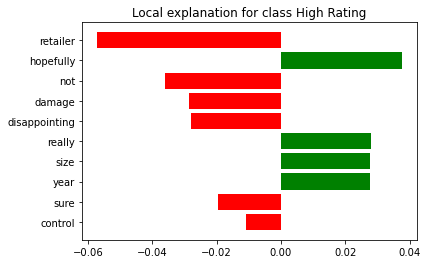

In [104]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [105]:
exp.show_in_notebook (text=False)

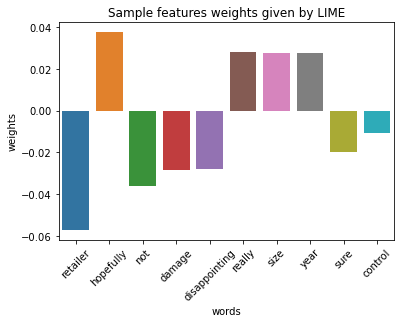

In [106]:
from collections import OrderedDict
import matplotlib.pyplot as plt
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

sns.barplot(x = "words", y = "weights", data = lime_weights)
plt.xticks(rotation = 45)
plt.title("Sample features weights given by LIME")
plt.show()

# Part C: Topic Modeling

1. Perform Latent Dirichlet Allocation on the entire corpus. You may assume that there are 10 latent topics.

2. Display the top 3 reviews for your first topic. Note that this will not be the same for all of you. HINT: Use the probabilities from the document-topic matrix to determine the top three reviews for the first topic.

In [107]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
corpus[:10]

['tag sew small long huge very then thread plasticy even itchy make intimate item such not comfortable also bralette time work cup however thin give support even cup only lounge bralette itchy',
 'really hope like not look way model not sharkbite hem much pronounced one photo look usually medium large medium there lot material bottom half photo show big not material nice weave thin delicate holly deep olive blue color',
 'usually medium buy small fit shape not baby doll dress top tent daughter say piece tablecloth back',
 'very excited order top red cute huge shapeless support have back look other review',
 'thin poor quality especially price thin pajama button terrible little shell button not have fast',
 'title fabric top good bad part design color vibrant combination material shoulder knit sweater navy fabric interesting however positive comment end top scratchy stiff frankly uncomfortable not imagine want wear benefit lining have problem scratchy itchy stiff fabric',
 'love fabric 

In [109]:
vetorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
num_topics = 10 # assume there is 10 latent topic
dtm = vectorizer.fit_transform(corpus)

In [111]:
lda = LatentDirichletAllocation(n_components=num_topics,learning_method='batch', max_iter=2000, random_state=0)
document_topics = lda.fit_transform(dtm)
feature_names = vectorizer.get_feature_names()

In [112]:
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print("Toipc %d:" % (idx))
        print(" ".join([feature_names[i]
                       for i in topic.argsort()[:-n_top_words -1:-1]]))

display_topics(lda, feature_names, 10)

Toipc 0:
fan shapeless totally cropped pleasantly sag giant excellent elbow dolman
Toipc 1:
slightly maternity pound green easily sweatshirt snag wish sad roomy
Toipc 2:
band rayon taste washable positive dirty suggest tablecloth sleep naturally
Toipc 3:
fabulous wouldn lavender pop tiny enormous happen entire factor midsection
Toipc 4:
bag occasion change jersey entirely beige booty camisole slip bandeau
Toipc 5:
dress top size not very fit look small color too
Toipc 6:
disappoint stick develop collar stitching puffy amp combo initially gentle
Toipc 7:
awesome office lack else daughter cuff embroidery section collar mine
Toipc 8:
amazing sticky let unwearable twice mess polyester combination placement vintage
Toipc 9:
breast romper either exception perfection question alter boob fantastic ease


In [113]:
document_topics

array([[0.01762464, 0.01762463, 0.01762464, ..., 0.01762464, 0.01762464,
        0.01762464],
       [0.015631  , 0.01564041, 0.015631  , ..., 0.01563387, 0.01563239,
        0.16854446],
       [0.02066447, 0.0206622 , 0.18148156, ..., 0.09005063, 0.02066303,
        0.0206636 ],
       ...,
       [0.01711857, 0.01711857, 0.20540129, ..., 0.01711996, 0.01711857,
        0.01711857],
       [0.01938374, 0.01938824, 0.01938078, ..., 0.01938116, 0.32590526,
        0.01938078],
       [0.02152336, 0.0215235 , 0.02152336, ..., 0.02152336, 0.02152336,
        0.02152336]])

In [114]:
document_topics.shape # 1356 rows of reviews and 10 columns of topics

(1356, 10)

In [115]:
document_topics[0] # this display the top probability of each topic in a document.

array([0.01762464, 0.01762463, 0.01762464, 0.01762464, 0.01762464,
       0.84137694, 0.01762598, 0.01762464, 0.01762464, 0.01762464])

In [116]:
#However we want to get the prob of a document for the first topic
topic_0=document_topics.transpose()[0]
topic_0

array([0.01762464, 0.015631  , 0.02066447, ..., 0.01711857, 0.01938374,
       0.02152336])

In [117]:
# get the indices of the top 3 reviews for the first topic, display it
indices = list(topic_0.argsort()[::-1][:3])
indices

[279, 606, 401]

In [118]:
df_new['Review Text'].iloc[[i for i in indices]] 

287                                 Totally see through.
720    I love the layered look of this jacket. i got ...
410    I purchased this sweater in a small . nothing ...
Name: Review Text, dtype: object

In [119]:
 # different indices show on the dataframe is because we dropped some rows with missing values at the beginning

In [121]:
# display the whole review text
clusters = zip(indices, list(df_new['Review Text'].iloc[[i for i in indices]]))
print("{0:<15}{1:<100s}".format("Review #","Review Text"))
for a, b in clusters:
    print("{0:<15}{1:<100s}".format(a,b))

Review #       Review Text                                                                                         
279            Totally see through.                                                                                
606            I love the layered look of this jacket. i got it in navy which matches everything. i think it's a little on the large side for me. i ordered a small. i'm 5'2" 130 lbs. super comfortable. the inner layer is very soft. once you wash it, the outside is soft too. i've already worn mine several times. happy.
401            I purchased this sweater in a small . nothing on the web site states it has dolman sleeves! it looked sloppy and made my bust disappear! it went back i hate dolman sleeves.
